In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from datetime import datetime
from dateutil.parser import parse
import textblob
from textblob import TextBlob

In [227]:
sid = SentimentIntensityAnalyzer()

In [230]:
# Importing Tweet Text
wc_df = pd.read_csv("https://raw.githubusercontent.com/solaojp/DATA-620/master/Fifareload.csv", header=None)

In [231]:
# Removing Duplicates
wc_df = wc_df.drop_duplicates()

In [232]:
wc_df.head()

,0,1,2
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN


In [233]:
wc_df = wc_df.drop([2], axis=1)

In [235]:
wc_df.columns = ['datetime','tweet']

In [236]:
# Assessing Sentiment Polarity for Each Tweet Using Vader
wc_df['sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in wc_df['tweet']]

In [237]:
wc_df.head()

,datetime,tweet,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


In [238]:
wc_df['datetime']=pd.to_datetime(wc_df['datetime'])

In [239]:
wc_df['date']=[datetime.date(y) for y in wc_df['datetime']]

In [240]:
# Identifying Tweet Volume by Date
tweet_volume = pd.value_counts(wc_df['date'].values)

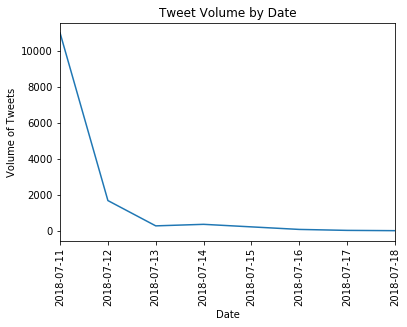

In [272]:
tweet_volume.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Volume of Tweets')
plt.title("Tweet Volume by Date")
plt.show()

In [243]:
# Calculating Mean Polarity by Date
wc_summary = wc_df['sentiment'].groupby(wc_df['date']).mean()

In [245]:
wc_summary = pd.DataFrame(wc_summary)

In [274]:
wc_summary

,sentiment,date
date,,
2018-07-11,0.270825,2018-07-11
2018-07-12,0.356083,2018-07-12
2018-07-13,0.295836,2018-07-13
2018-07-14,0.464895,2018-07-14
2018-07-15,0.300899,2018-07-15
2018-07-16,0.405941,2018-07-16
2018-07-17,0.291378,2018-07-17
2018-07-18,0.280472,2018-07-18


In [246]:
wc_summary['date'] = wc_summary.index

In [247]:
# Calculating Median Polarity by Date
wc_summary2 = wc_df['sentiment'].groupby(wc_df['date']).median()

In [249]:
wc_summary2 = pd.DataFrame(wc_summary2)

In [ ]:
wc_summary2

In [250]:
wc_summary2['date'] = wc_summary2.index

In [256]:
# Assessing Sentiment Polarity for Each Tweet Using TextBlob
wc_df['sentiment2'] = [TextBlob(tweet).sentiment[0] for tweet in wc_df['tweet']]

In [257]:
wc_df.head()

,datetime,tweet,sentiment,date,sentiment2
0,2018-07-13 18:42:00,b'Any word on who won the Sham Fight this year...,0.2732,2018-07-13,-0.2000
1,2018-07-13 18:42:00,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229,2018-07-13,-0.7125
2,2018-07-13 18:39:00,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000,2018-07-13,0.0000
3,2018-07-13 18:39:00,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182,2018-07-13,-0.1500
4,2018-07-13 18:39:00,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000,2018-07-13,0.0000


In [258]:
# Calculating Mean Polarity by Date
wc_summary_tb = wc_df['sentiment2'].groupby(wc_df['date']).mean()

In [259]:
wc_summary_tb = pd.DataFrame(wc_summary_tb)

In [260]:
wc_summary_tb['date'] = wc_summary_tb.index

In [261]:
wc_summary_tb

,sentiment2,date
date,,
2018-07-11,0.165400,2018-07-11
2018-07-12,0.226797,2018-07-12
2018-07-13,0.240344,2018-07-13
2018-07-14,0.461612,2018-07-14
2018-07-15,0.169344,2018-07-15
2018-07-16,0.182509,2018-07-16
2018-07-17,0.226709,2018-07-17
2018-07-18,0.214042,2018-07-18


In [262]:
# Calculating Median Polarity by Date
wc_summary_tb2 = wc_df['sentiment2'].groupby(wc_df['date']).median()

In [263]:
wc_summary_tb2 = pd.DataFrame(wc_summary_tb2)

In [264]:
wc_summary_tb2['date'] = wc_summary_tb2.index

In [265]:
wc_summary_tb2

,sentiment2,date
date,,
2018-07-11,0.000,2018-07-11
2018-07-12,0.125,2018-07-12
2018-07-13,0.000,2018-07-13
2018-07-14,0.500,2018-07-14
2018-07-15,0.000,2018-07-15
2018-07-16,0.025,2018-07-16
2018-07-17,0.000,2018-07-17
2018-07-18,0.000,2018-07-18


In [266]:
wc_summary3 = pd.merge(wc_summary, wc_summary_tb, on='date')

In [267]:
wc_summary4 = pd.merge(wc_summary2, wc_summary_tb2, on='date')

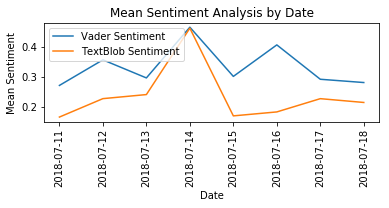

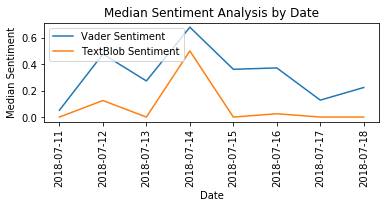

In [271]:
plt.subplot(2, 1, 1)
plt.plot(wc_summary3['date'],wc_summary3['sentiment'])
plt.plot(wc_summary3['date'],wc_summary3['sentiment2'])
plt.xticks(rotation=90)
plt.legend(['Vader Sentiment', 'TextBlob Sentiment'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title("Mean Sentiment Analysis by Date")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(wc_summary4['date'],wc_summary4['sentiment'])
plt.plot(wc_summary4['date'],wc_summary4['sentiment2'])
plt.xticks(rotation=90)
plt.legend(['Vader Sentiment', 'TextBlob Sentiment'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Median Sentiment')
plt.title("Median Sentiment Analysis by Date")
plt.show()